In [49]:
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import scipy.stats as st
import pandas as pd

In [87]:
def draw_image(scan, cmap=None, aspect=None, interpolation=None, figsize=None, start_y=0, delta_w=7e9):
    plt.figure(figsize=figsize)
    plt.imshow(np.array(scan).transpose()[start_y:], cmap=cmap, aspect=aspect, interpolation=interpolation)

In [78]:
def get_abs_values(array):
    rows = []
    for i in range(0, len(array)):
        rows.append(abs(array[i]))
    return rows

In [84]:
def get_time_domain(array):
    rows = []
    for i in range(0, len(array)):
        rows.append(np.fft.irfft(np.array(array[0])))
    return rows

In [79]:
def join_as_complex(array):
    rows = []
    for i in range(0, len(array)):
        if i % 2 == 1:
            continue
        complex_number = array[i] + 1j*array[i+1]
        rows.append(complex_number)
    return rows

In [80]:
# samples are stored as files with 100 rows in a folder
sand_path = 'sixth-scan/sand/parsed/'
cybertruck_path = 'sixth-scan/cybertruck/parsed/'

(2.15546896161746e-05-0.07609916545490582j)
0.07609916850753216


TypeError: Invalid shape (98,) for image data

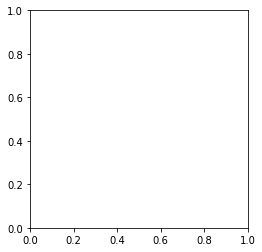

In [92]:
# read mined data for machine learning
rows = []
for file in os.listdir(sand_path):
    with open(sand_path + file) as file:
        skip = True
        for row in np.loadtxt(file, comments='%', delimiter=',').transpose():
            if not skip:
                rows.append(row)
            skip = False

complexRows = []
for i in range(len(rows)):
    complexRows.append(join_as_complex(rows[i]))
print(complexRows[0][0])
  
absComplexRows = []
for i in range(len(complexRows)):
    absComplexRows.append(get_abs_values(complexRows[i]))
print(absComplexRows[0][0])    
    
timeDomainRows = get_time_domain(rows)
draw_image(timeDomainRows[0])
    
# pd.DataFrame(timeDomainRows)

In [37]:
# export model
pkl_filename = "pickle_rick_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)